In [6]:
!pip install tensorflow

In [7]:
# Importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("C:\\Users\\Suwarna\\OneDrive\\Desktop\\Dataset.csv")
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

# # Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [11]:
df.shape

(91713, 186)

In [12]:
#checking missing values
df.isnull().any().sum()

175

In [13]:
df.isnull().sum().sort_values(ascending = True)

encounter_id            0
pre_icu_los_days        0
icu_type                0
icu_stay_type           0
icu_id                  0
                    ...  
h1_albumin_min      83824
h1_lactate_min      84369
h1_lactate_max      84369
h1_bilirubin_max    84619
h1_bilirubin_min    84619
Length: 186, dtype: int64

In [14]:
# statistical measures about the data
df.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  apache_4a_hospital_death_prob  \
count  91713.000000      91713.000000  ...                   83766.000000   
mean     508.357692          0.835766  ...                       0.086787   
std      228.989661          2.487756  ...                       0.247569   
min       82.000000        -24.947222  ...                      -1.000000   
25%      369.000000          0.035417  ...                       0.020000   
50%      504.000000          0.138889  ...                       0.050000   
75%      679.000000          0.409028  ...                       0.130000   
max      927.000000        159.090972  ...                       0.990000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              83766.000000  90998.000000  90998.000000   
mean                   0.043955      0.000857      0.015693   
std                    0.217341      0.029265      0.124284   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       90998.000000     90998.000000       90998.000000  90998.000000   
mean            0.225192         0.012989           0.026165      0.007066   
std             0.417711         0.113229           0.159628      0.083763   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  
count  90998.000000                 90998.000000  
mean       0.004132                     0.020638  
std        0.064148                     0.142169  
min        0.000000                     0.000000  
25%        0.000000                     0.000000  
50%        0.000000                     0.000000  
75%        0.000000                     0.000000  
max        1.000000                     1.000000  

[8 rows x 178 columns]

In [15]:
# checking the distribution of Target Varibale
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [16]:
df.groupby('hospital_death').mean()

encounter_id    patient_id  hospital_id        age        bmi  \
hospital_death                                                                  
0               65666.975501  65480.459629   105.693501  61.748741  29.264902   
1               64961.356412  66137.129754   105.412634  68.494156  28.340398   

                elective_surgery      height      icu_id  pre_icu_los_days  \
hospital_death                                                               
0                       0.194873  169.706029  508.287716          0.787357   
1                       0.065824  168.952094  509.098547          1.348287   

                readmission_status  ...  apache_4a_hospital_death_prob  \
hospital_death                      ...                                  
0                              0.0  ...                       0.062882   
1                              0.0  ...                       0.334838   

                apache_4a_icu_death_prob      aids  cirrhosis  \
hospital_death                                                  
0                               0.024799  0.000818   0.014188   
1                               0.242726  0.001277   0.031673   

                diabetes_mellitus  hepatic_failure  immunosuppression  \
hospital_death                                                          
0                        0.227215         0.011639           0.024012   
1                        0.203704         0.027331           0.049042   

                leukemia  lymphoma  solid_tumor_with_metastasis  
hospital_death                                                   
0               0.006301  0.003763                     0.018409  
1               0.015198  0.008046                     0.044317  

[2 rows x 177 columns]

<AxesSubplot:xlabel='hospital_death', ylabel='count'>

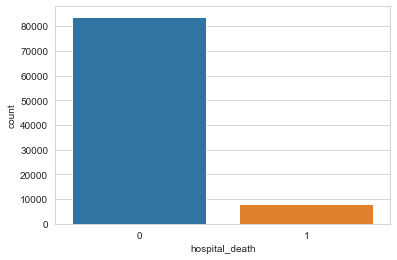

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='hospital_death',data=df)

In [18]:
object_columns = df.select_dtypes(include=['object']).columns

In [19]:
object_columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [20]:
cols = df.select_dtypes([np.number]).columns
cols

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=178)

In [21]:
### Checking Outliers

<AxesSubplot:xlabel='hospital_death', ylabel='Density'>

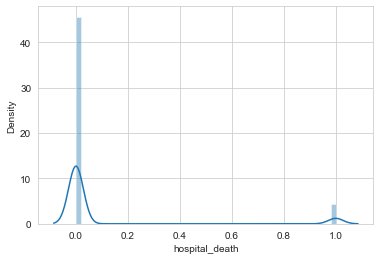

In [22]:
sns.distplot(df['hospital_death']) 

<AxesSubplot:xlabel='hepatic_failure', ylabel='Density'>

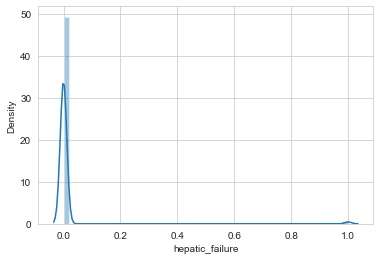

In [23]:
sns.distplot(df['hepatic_failure']) 

<AxesSubplot:xlabel='solid_tumor_with_metastasis', ylabel='Density'>

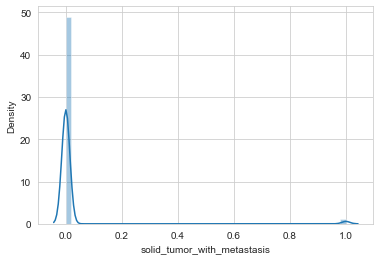

In [24]:
sns.distplot(df['solid_tumor_with_metastasis']) 

In [25]:
#### Filling missing values 
### Catgorical variables with mode and Numerical variables with mean

In [26]:
df[cols] = df[cols].fillna(df[cols].mean())

In [27]:
df[cols]

encounter_id  patient_id  hospital_id  hospital_death        age  \
0             66154       25312          118               0  68.000000   
1            114252       59342           81               0  77.000000   
2            119783       50777          118               0  25.000000   
3             79267       46918          118               0  81.000000   
4             92056       34377           33               0  19.000000   
...             ...         ...          ...             ...        ...   
91708         91592       78108           30               0  75.000000   
91709         66119       13486          121               0  56.000000   
91710          8981       58179          195               0  48.000000   
91711         33776      120598           66               0  62.309516   
91712          1671       53612          104               0  82.000000   

             bmi  elective_surgery  height  icu_id  pre_icu_los_days  ...  \
0      22.730000                 0   180.3      92          0.541667  ...   
1      27.420000                 0   160.0      90          0.927778  ...   
2      31.950000                 0   172.7      93          0.000694  ...   
3      22.640000                 1   165.1      92          0.000694  ...   
4      29.185818                 0   188.0      91          0.073611  ...   
...          ...               ...     ...     ...               ...  ...   
91708  23.060250                 0   177.8     927          0.298611  ...   
91709  47.179671                 0   183.0     925          0.120139  ...   
91710  27.236914                 0   170.2     908          0.046528  ...   
91711  23.297481                 0   154.9     922          0.081944  ...   
91712  22.031250                 1   160.0     926          0.018056  ...   

       apache_4a_hospital_death_prob  apache_4a_icu_death_prob  aids  \
0                           0.100000                  0.050000   0.0   
1                           0.470000                  0.290000   0.0   
2                           0.000000                  0.000000   0.0   
3                           0.040000                  0.030000   0.0   
4                           0.086787                  0.043955   0.0   
...                              ...                       ...   ...   
91708                       0.120000                  0.050000   0.0   
91709                       0.030000                  0.020000   0.0   
91710                       0.050000                  0.020000   0.0   
91711                       0.070000                  0.020000   0.0   
91712                       0.190000                  0.080000   0.0   

       cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
0            0.0                1.0              0.0                0.0   
1            0.0                1.0              0.0                0.0   
2            0.0                0.0              0.0                0.0   
3            0.0                0.0              0.0                0.0   
4            0.0                0.0              0.0                0.0   
...          ...                ...              ...                ...   
91708        0.0                1.0              0.0                0.0   
91709        0.0                0.0              0.0                0.0   
91710        0.0                1.0              0.0                0.0   
91711        0.0                0.0              0.0                0.0   
91712        0.0                0.0              0.0                0.0   

       leukemia  lymphoma  solid_tumor_with_metastasis  
0           0.0       0.0                          0.0  
1           0.0       0.0                          0.0  
2           0.0       0.0                          0.0  
3           0.0       0.0                          0.0  
4           0.0       0.0                          0.0  
...         ...       ...                          ...  
91708       0.0 

In [28]:
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
for i in object_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    print(i)

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


In [29]:
df.isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 186, dtype: int64

In [30]:
df.isnull().any().sum()

0

In [31]:
#### Encoding Concept 

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
#
# Encode labels of multiple columns at once
#
df[object_columns] = df[object_columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0         66154       25312          118               0  68.0  22.730000   
1        114252       59342           81               0  77.0  27.420000   
2        119783       50777          118               0  25.0  31.950000   
3         79267       46918          118               0  81.0  22.640000   
4         92056       34377           33               0  19.0  29.185818   

   elective_surgery  ethnicity  gender  height  ...  aids  cirrhosis  \
0                 0          2       1   180.3  ...   0.0        0.0   
1                 0          2       0   160.0  ...   0.0        0.0   
2                 0          2       0   172.7  ...   0.0        0.0   
3                 1          2       0   165.1  ...   0.0        0.0   
4                 0          2       1   188.0  ...   0.0        0.0   

   diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                1.0              0.0                0.0       0.0       0.0   
1                1.0              0.0                0.0       0.0       0.0   
2                0.0              0.0                0.0       0.0       0.0   
3                0.0              0.0                0.0       0.0       0.0   
4                0.0              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                     9                    0  
1                          0.0                     8                    6  
2                          0.0                     5                    3  
3                          0.0                     0                    0  
4                          0.0                    10                    7  

[5 rows x 186 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int32(8), int64(8)
memory usage: 127.3 MB


In [34]:
### Building a Model

In [35]:
X = df.drop(columns='hospital_death', axis=1)
Y = df['hospital_death']

In [36]:
X

encounter_id  patient_id  hospital_id        age        bmi  \
0             66154       25312          118  68.000000  22.730000   
1            114252       59342           81  77.000000  27.420000   
2            119783       50777          118  25.000000  31.950000   
3             79267       46918          118  81.000000  22.640000   
4             92056       34377           33  19.000000  29.185818   
...             ...         ...          ...        ...        ...   
91708         91592       78108           30  75.000000  23.060250   
91709         66119       13486          121  56.000000  47.179671   
91710          8981       58179          195  48.000000  27.236914   
91711         33776      120598           66  62.309516  23.297481   
91712          1671       53612          104  82.000000  22.031250   

       elective_surgery  ethnicity  gender  height  hospital_admit_source  \
0                     0          2       1   180.3                      4   
1                     0          2       0   160.0                      4   
2                     0          2       0   172.7                      3   
3                     1          2       0   165.1                      8   
4                     0          2       1   188.0                      3   
...                 ...        ...     ...     ...                    ...   
91708                 0          2       1   177.8                      0   
91709                 0          2       0   183.0                      3   
91710                 0          2       1   170.2                      3   
91711                 0          2       0   154.9                      3   
91712                 1          2       0   160.0                      3   

       ...  aids  cirrhosis  diabetes_mellitus  hepatic_failure  \
0      ...   0.0        0.0                1.0              0.0   
1      ...   0.0        0.0                1.0              0.0   
2      ...   0.0        0.0                0.0              0.0   
3      ...   0.0        0.0                0.0              0.0   
4      ...   0.0        0.0                0.0              0.0   
...    ...   ...        ...                ...              ...   
91708  ...   0.0        0.0                1.0              0.0   
91709  ...   0.0        0.0                0.0              0.0   
91710  ...   0.0        0.0                1.0              0.0   
91711  ...   0.0        0.0                0.0              0.0   
91712  ...   0.0        0.0                0.0              0.0   

       immunosuppression  leukemia  lymphoma  solid_tumor_with_metastasis  \
0                    0.0       0.0       0.0                          0.0   
1                    0.0       0.0       0.0                          0.0   
2                    0.0       0.0       0.0                          0.0   
3                    0.0       0.0       0.0                          0.0   
4                    0.0       0.0       0.0                          0.0   
...                  ...       ...       ...                          ...   
91708                0.0       0.0       0.0                          1.0   
91709                0.0       0.0       0.0                          0.0   
91710                0.0       0.0       0.0                          0.0   
91711                0.0       0.0       0.0                          0.0   
91712                0.0       0.0       0.0                          0.0   

       apache_3j_bodysystem  apache_2_bodysystem  
0                         9                    0  
1                         8                    6  
2                         5                    3  
3                         0                    0  
4                        10                    7  
...                     ...                  ...  
91708                     9                    0  
91709                     9                    0  
91710                     5                    3  
9

In [37]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

In [38]:
### Splitting the data into training data & Testing data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(91713, 185) (82541, 185) (9172, 185)


In [41]:
### Feature selection

In [42]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.        , 0.        , 0.00725052, 0.00727071, 0.00185692,
       0.00619611, 0.01046357, 0.00389655, 0.        , 0.01057084,
       0.00835864, 0.00864947, 0.00098727, 0.008042  , 0.00208521,
       0.        , 0.00327952, 0.01521995, 0.03443881, 0.03817522,
       0.00363245, 0.00104611, 0.01367525, 0.01725337, 0.01612757,
       0.02594801, 0.03667086, 0.04081187, 0.00106394, 0.03680055,
       0.00905247, 0.01409172, 0.00318716, 0.01436155, 0.01899357,
       0.02797235, 0.02579029, 0.02820177, 0.03074205, 0.00641589,
       0.00678955, 0.02145821, 0.01090155, 0.02632197, 0.01207628,
       0.01395002, 0.01735147, 0.00173294, 0.01913953, 0.00214843,
       0.0170666 , 0.01463342, 0.01472654, 0.01442849, 0.01831516,
       0.00276356, 0.02170445, 0.00213202, 0.02120456, 0.01112572,
       0.00953117, 0.01128765, 0.02317566, 0.01715345, 0.02062454,
       0.00266247, 0.02643732, 0.00186713, 0.02642695, 0.01670435,
       0.02157325, 0.01631707, 0.00966042, 0.00275639, 0.00908

In [43]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

apache_4a_hospital_death_prob    0.074277
apache_4a_icu_death_prob         0.072540
d1_lactate_min                   0.042326
gcs_motor_apache                 0.040812
d1_lactate_max                   0.038810
                                   ...   
height                           0.000000
readmission_status               0.000000
solid_tumor_with_metastasis      0.000000
patient_id                       0.000000
encounter_id                     0.000000
Length: 185, dtype: float64

<AxesSubplot:>

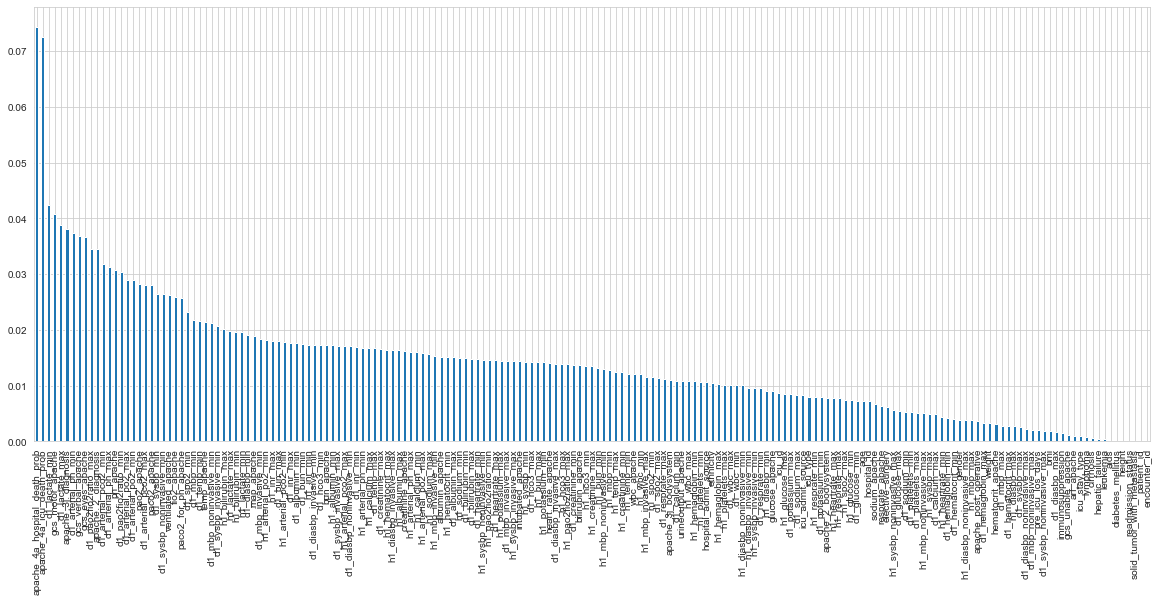

In [44]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [45]:
from sklearn.feature_selection import SelectKBest

In [46]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['apache_3j_diagnosis', 'd1_lactate_max', 'd1_lactate_min',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'],
      dtype='object')

In [47]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

In [48]:
### Standardize the data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [51]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
import tensorflow as tf
#Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [54]:
# fit the keras model on the dataset
history = model.fit(X_train_std, Y_train, epochs=50, validation_split=0.1,batch_size=10)



Epoch 1/50
7429/7429 [==============================] - 8s 1ms/step - loss: 0.2186 - accuracy: 0.9228 - precision: 0.6750 - recall: 0.2207 - val_loss: 0.2214 - val_accuracy: 0.9217 - val_precision: 0.6994 - val_recall: 0.1692
Epoch 2/50
7429/7429 [==============================] - 14s 2ms/step - loss: 0.2192 - accuracy: 0.9222 - precision: 0.6686 - recall: 0.2140 - val_loss: 0.2189 - val_accuracy: 0.9239 - val_precision: 0.6968 - val_recall: 0.2154
Epoch 3/50
7429/7429 [==============================] - 16s 2ms/step - loss: 0.2186 - accuracy: 0.9227 - precision: 0.6752 - recall: 0.2193 - val_loss: 0.2205 - val_accuracy: 0.9226 - val_precision: 0.6218 - val_recall: 0.2713
Epoch 4/50
7429/7429 [==============================] - 14s 2ms/step - loss: 0.2193 - accuracy: 0.9224 - precision: 0.6707 - recall: 0.2163 - val_loss: 0.2199 - val_accuracy: 0.9232 - val_precision: 0.6337 - val_recall: 0.2685
Epoch 5/50
7429/7429 [==============================] - 12s 2ms/step - loss: 0.2194 - accurac

In [56]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_std, Y_test)
print('Accuracy: %.2f' % (accuracy*100))
_,precision = model.evaluate(X_test_std, Y_test)
print('Precision: %f' % precision)
_,recall = model.evaluate(X_test_std, Y_test)
print('Recall: %f' % recall)




287/287 [==============================] - 1s 2ms/step - loss: 0.2027 - accuracy: 0.9311 - precision: 0.6429 - recall: 0.2859


ValueError: too many values to unpack (expected 2)

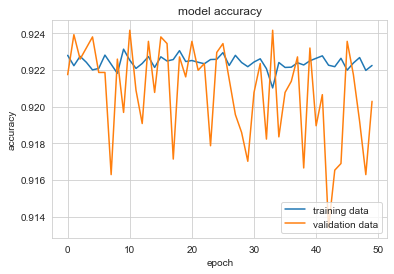

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

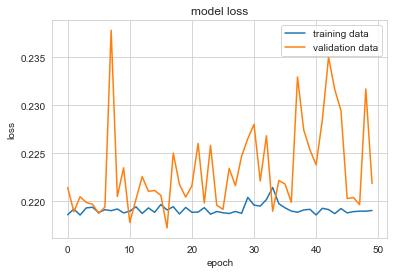

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [59]:
#saving the model
model.save('keras_model.h5')

In [60]:
#loading the model 
from keras.models import load_model
model = load_model('keras_model.h5')

# Explainable AI

In [61]:
import shap
shap.initjs()

In [62]:
X_sample =pd.DataFrame( X_train_new,columns = X_train.columns[sel_five_cols.get_support()]).sample(100)

In [63]:
X_sample

apache_3j_diagnosis  d1_lactate_max  d1_lactate_min  \
52701               501.02        2.927383        2.125128   
18035               208.01        2.927383        2.125128   
57209               108.01        1.700000        1.700000   
45659               704.01        2.927383        2.125128   
76917               102.01        2.927383        2.125128   
...                    ...             ...             ...   
36054               901.01        2.927383        2.125128   
51308               501.05        1.900000        1.900000   
52390              1404.01        2.927383        2.125128   
34554               211.09        2.927383        2.125128   
28685                 0.25        2.927383        2.125128   

       apache_4a_hospital_death_prob  apache_4a_icu_death_prob  
52701                           0.22                      0.13  
18035                           0.03                      0.01  
57209                           0.01                      0.00  
45659                           0.01                      0.01  
76917                           0.77                      0.60  
...                              ...                       ...  
36054                          -1.00                     -1.00  
51308                           0.12                      0.08  
52390                           0.15                      0.06  
34554                           0.07                      0.02  
28685                           0.04                      0.01  

[100 rows x 5 columns]

In [64]:
explainer = shap.KernelExplainer(model.predict,X_train_new)

Using 82541 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [66]:
shap_values = explainer.shap_values(X_sample)

100%|██████████| 100/100 [2:59:08<00:00, 107.48s/it] 


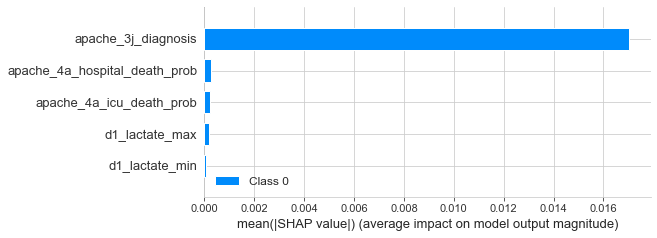

In [67]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [68]:
###force plot
shap.force_plot(explainer.expected_value[0], shap_values[0], features = X_sample)

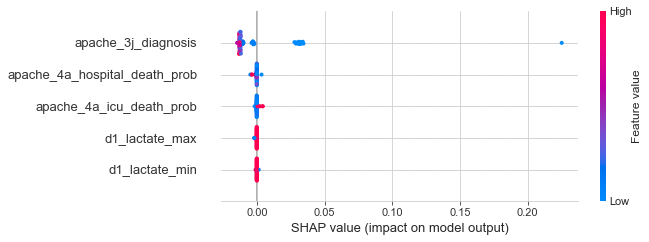

In [69]:
shap.summary_plot(shap_values[0], features = X_sample)